## **Universidad del Valle de Guatemala**
##### Departamento de Computación - Modelación y Simulación - Catedrático: Oceas Paredes
---
#### **Estudiante:** Rudik Roberto Rompich 
#### **Carrera:** Licenciatura en Matemática Aplicada 
#### **Carné:** 19857
---
# **5 puntos extras**
### Fecha de entrega: ***11 de agosto de 2021***

---

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
ensayos = 1000

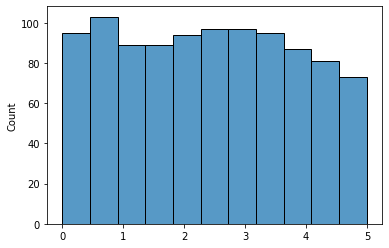

In [ ]:
tiempo_entre_llegada = np.random.uniform(0,5,ensayos)
sns.histplot(tiempo_entre_llegada)

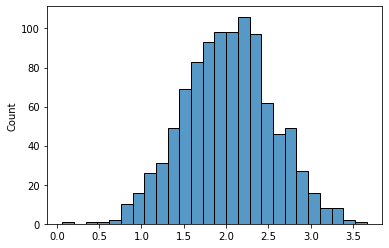

In [ ]:
tiempo_de_servicio = np.random.normal(2,0.5, ensayos)
sns.histplot(tiempo_de_servicio)

In [ ]:
# Tiempo_entre_llegada - Tiempo_de_llegada - Tiempo_de_inicio_de_servicio - Tiempo_de_espera - Tiempo_de_servicio - Tiempo_de_finalizacion - Tiempo_en_el_sistema - ATM_1 - ATM_2

# Primer cliente 

cliente1_tiempo_entre_llegada =tiempo_entre_llegada[0]
cliente1_tiempo_de_llegada= cliente1_tiempo_entre_llegada
cliente1_tiempo_de_inicio_de_servicio = cliente1_tiempo_de_llegada
cliente1_tiempo_de_espera = cliente1_tiempo_de_inicio_de_servicio - cliente1_tiempo_de_llegada
cliente1_tiempo_de_servicio =  tiempo_de_servicio[0]
cliente1_tiempo_de_finalizacion = cliente1_tiempo_de_inicio_de_servicio + cliente1_tiempo_de_servicio
cliente1_tiempo_en_el_sistema = cliente1_tiempo_de_finalizacion-cliente1_tiempo_de_llegada
cliente1_atm1 = cliente1_tiempo_de_finalizacion
cliente1_atm2 = 0  

simulacion = [[cliente1_tiempo_entre_llegada, cliente1_tiempo_de_llegada,cliente1_tiempo_de_inicio_de_servicio, 
              cliente1_tiempo_de_espera, cliente1_tiempo_de_servicio, cliente1_tiempo_de_finalizacion, 
              cliente1_tiempo_en_el_sistema, cliente1_atm1, cliente1_atm2]]


In [ ]:
at1 = 1
at1_tiempo = cliente1_tiempo_de_servicio
at1_espera = 0
at2 = 0
at2_tiempo = 0
at2_espera = 0

for i in range (1,ensayos): 

  fila_anterior = simulacion[i-1]
  clientes_tiempo_entre_llegada= tiempo_entre_llegada[i]
  clientes_tiempo_de_llegada= clientes_tiempo_entre_llegada + fila_anterior[1]
  if clientes_tiempo_de_llegada <= np.min([fila_anterior[-1],fila_anterior[-2]]): 
    clientes_tiempo_de_inicio_de_servicio= np.min([fila_anterior[-1],fila_anterior[-2]])

  else: 
    clientes_tiempo_de_inicio_de_servicio = clientes_tiempo_de_llegada

  clientes_tiempo_de_espera = clientes_tiempo_de_inicio_de_servicio - clientes_tiempo_de_llegada
  clientes_tiempo_de_servicio =  tiempo_de_servicio[i]
  clientes_tiempo_de_finalizacion = clientes_tiempo_de_inicio_de_servicio + clientes_tiempo_de_servicio
  clientes_tiempo_en_el_sistema = clientes_tiempo_de_finalizacion-clientes_tiempo_de_llegada

  if fila_anterior[-2] == np.min([fila_anterior[-2],fila_anterior[-1]]):
    clientes_atm1 = clientes_tiempo_de_finalizacion
  else: 
    clientes_atm1= fila_anterior[-2]  
    at1 +=1
    at1_tiempo += clientes_tiempo_de_servicio
    if clientes_tiempo_de_espera > 0:
      at1_espera +=1
    
  if fila_anterior[-1] == np.min([fila_anterior[-2],fila_anterior[-1]]):
    clientes_atm2 = clientes_tiempo_de_finalizacion
  else: 
    clientes_atm2= fila_anterior[-1]
    at2 +=1
    at2_tiempo += clientes_tiempo_de_servicio
    if clientes_tiempo_de_espera > 0:
      at2_espera +=1

  simulacion.append([clientes_tiempo_entre_llegada, clientes_tiempo_de_llegada,clientes_tiempo_de_inicio_de_servicio, 
              clientes_tiempo_de_espera, clientes_tiempo_de_servicio, clientes_tiempo_de_finalizacion, 
              clientes_tiempo_en_el_sistema, clientes_atm1, clientes_atm2])


In [ ]:

df = pd.DataFrame(simulacion, columns=["Tiempo_entre_llegada", "Tiempo_de_llegada", "Tiempo_de_inicio_de_servicio",
                                  "Tiempo_de_espera","Tiempo_de_servicio", "Tiempo_de_finalizacion", "Tiempo_en_el_sistema", "ATM_1", "ATM_2"])
df

,Tiempo_entre_llegada,Tiempo_de_llegada,Tiempo_de_inicio_de_servicio,Tiempo_de_espera,Tiempo_de_servicio,Tiempo_de_finalizacion,Tiempo_en_el_sistema,ATM_1,ATM_2
0,3.654288,3.654288,3.654288,0.0,2.118710,5.772997,2.118710,5.772997,0.000000
1,2.923453,6.577740,6.577740,0.0,1.608047,8.185787,1.608047,5.772997,8.185787
2,2.460738,9.038478,9.038478,0.0,1.698335,10.736813,1.698335,10.736813,8.185787
3,2.336052,11.374531,11.374531,0.0,2.914270,14.288801,2.914270,10.736813,14.288801
4,3.085387,14.459918,14.459918,0.0,1.900307,16.360225,1.900307,16.360225,14.288801
...,...,...,...,...,...,...,...,...,...
995,2.296868,2404.068378,2404.068378,0.0,2.824224,2406.892602,2.824224,2403.820924,2406.892602
996,1.259628,2405.328006,2405.328006,0.0,2.694722,2408.022728,2.694722,2408.022728,2406.892602
997,4.421665,2409.749671,2409.749671,0.0,1.694755,2411.444426,1.694755,2408.022728,2411.444426
998,3.908055,2413.657725,2413.657725,0.0,1.747996,2415.405721,1.747996,2415.405721,2411.444426


In [ ]:
print("ATM_1")
print(f"Número de usos: {at1}")
print(f"Porcentaje de uso: {at1/ensayos}")
print(f"Tiempo promedio de uso {at1_tiempo/at1}")
print(f"Clientes que esperaron {at1_espera}")
print(f"Porcentaje de cliente que esperaron: {at1_espera/at1}")
print("\nATM_2")
print(f"Número de usos: {at2}")
print(f"Porcentaje de uso: {at2/ensayos}")
print(f"Tiempo promedio de uso {at2_tiempo/at2}")
print(f"Clientes que esperaron {at2_espera}")
print(f"Porcentaje de cliente que esperaron: {at2_espera/at1}")


print("\nRESUlTADOS GLOBALES")
print(f"Simulaciones: {ensayos}")
personas_esperaron= df["Tiempo_de_espera"]>0
personas_esperaron= personas_esperaron.value_counts().loc[True]
print(f"Personas que esperaron: {personas_esperaron}")
print(f"Porcentaje de personas que esperaron: {personas_esperaron/ensayos}")
tiempo_de_espera = df["Tiempo_de_espera"].mean()
print(f"Promedio de espera: {tiempo_de_espera}")
tiempo_maximo_de_espera = df["Tiempo_de_espera"].max()
print(f"Máximo tiempo de espera: {tiempo_maximo_de_espera}")
porcentaje_de_uso_cajeros= df["Tiempo_de_servicio"].mean()
print(f"Porcentaje de uso de los cajeros: {porcentaje_de_uso_cajeros}")

ATM_1
Número de usos: 502
Porcentaje de uso: 0.502
Tiempo promedio de uso 2.0226510164467797
Clientes que esperaron 64
Porcentaje de cliente que esperaron: 0.12749003984063745

ATM_2
Número de usos: 498
Porcentaje de uso: 0.498
Tiempo promedio de uso 2.0195224802654796
Clientes que esperaron 53
Porcentaje de cliente que esperaron: 0.10557768924302789

RESUlTADOS GLOBALES
Simulaciones: 1000
Personas que esperaron: 117
Porcentaje de personas que esperaron: 0.117
Promedio de espera: 0.09306681812843075
Máximo tiempo de espera: 3.500246755906119
Porcentaje de uso de los cajeros: 2.0210930054284915
